# Tratamiento de la información para su análisis

Todo el contenido de la formación esta incluido en este notebook y los datasets facilitados.

Puede ser necesaria la instalación de alguna librería adicional. El proceso se explicará durante la ejecución.

## Detección y tratamiento de valores nulos

- Descartar las entradas de la tabla que contengan valores nulos

- Convertir los valores nulos a un nuevo valor:
    + que no aporte información
    
    + que aporte información

## Contexto Spark

In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [2]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
meteo = sqlContext.read.format("com.databricks.spark.csv").option("header", "true")\
                .option("inferschema", "true").option("mode","DROPMALFORMED").option("delimiter", ",")\
                .load("data/meteo.csv")

In [4]:
meteo.printSchema()

root
 |-- TEMP_MAX: double (nullable = true)
 |-- TEMP_MIN: double (nullable = true)
 |-- PLUVIOMETRIA: double (nullable = true)
 |-- DIA: double (nullable = true)
 |-- MES: double (nullable = true)



In [5]:
meteo.head(5)

[Row(TEMP_MAX=14.6, TEMP_MIN=8.8, PLUVIOMETRIA=0.0, DIA=1.0, MES=1.0),
 Row(TEMP_MAX=11.4, TEMP_MIN=5.8, PLUVIOMETRIA=0.1, DIA=2.0, MES=1.0),
 Row(TEMP_MAX=11.9, TEMP_MIN=5.1, PLUVIOMETRIA=0.0, DIA=3.0, MES=1.0),
 Row(TEMP_MAX=13.8, TEMP_MIN=7.2, PLUVIOMETRIA=0.0, DIA=4.0, MES=1.0),
 Row(TEMP_MAX=9.5, TEMP_MIN=4.6, PLUVIOMETRIA=0.0, DIA=5.0, MES=1.0)]

In [6]:
type(meteo)

pyspark.sql.dataframe.DataFrame

In [7]:
meteo.show()

+--------+--------+------------+----+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA| DIA|MES|
+--------+--------+------------+----+---+
|    14.6|     8.8|         0.0| 1.0|1.0|
|    11.4|     5.8|         0.1| 2.0|1.0|
|    11.9|     5.1|         0.0| 3.0|1.0|
|    13.8|     7.2|         0.0| 4.0|1.0|
|     9.5|     4.6|         0.0| 5.0|1.0|
|     8.8|     1.6|         0.0| 6.0|1.0|
|    14.7|     8.7|         0.0| 7.0|1.0|
|    13.2|    10.4|         0.0| 8.0|1.0|
|    11.8|     8.6|         0.0| 9.0|1.0|
|    12.3|     9.4|         0.0|10.0|1.0|
|    11.8|     5.7|         0.0|11.0|1.0|
|    10.6|     3.3|         0.0|12.0|1.0|
|    null|    null|        null|13.0|1.0|
|     9.1|     4.4|         1.0|14.0|1.0|
|     9.7|     4.8|         5.4|15.0|1.0|
|     8.5|     0.9|         0.0|16.0|1.0|
|     7.0|    -0.5|         0.0|17.0|1.0|
|    10.1|     2.6|         0.0|18.0|1.0|
|     9.1|     2.6|         0.0|19.0|1.0|
|     9.2|     2.3|         0.0|20.0|1.0|
+--------+--------+------------+--

In [8]:
enero = meteo.filter("MES = 1.0")

In [9]:
enero.count()

31

Cargamos la librería matplotlib para visualización

In [10]:
import matplotlib.pyplot as plt;
#The plots in this document are made using matplotlib’s ggplot style (new in version 1.4):
import matplotlib
matplotlib.style.use('ggplot')

In [169]:
matplotlib.__version__

'2.0.0'

In [11]:
import numpy as np
import pandas as pd

In [171]:
print(np.__version__)
print(pd.__version__)

1.12.1
0.19.2


In [12]:
enero_pd = enero.toPandas()
len(enero_pd)

31

Queremos representar la curva de temperaturas máximas del mes

In [13]:
plt.plot?

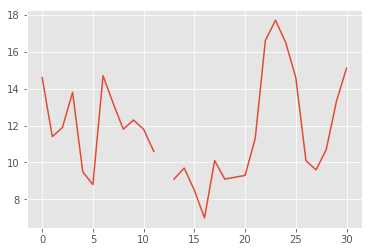

In [14]:
plt.plot(enero_pd['TEMP_MAX'])

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

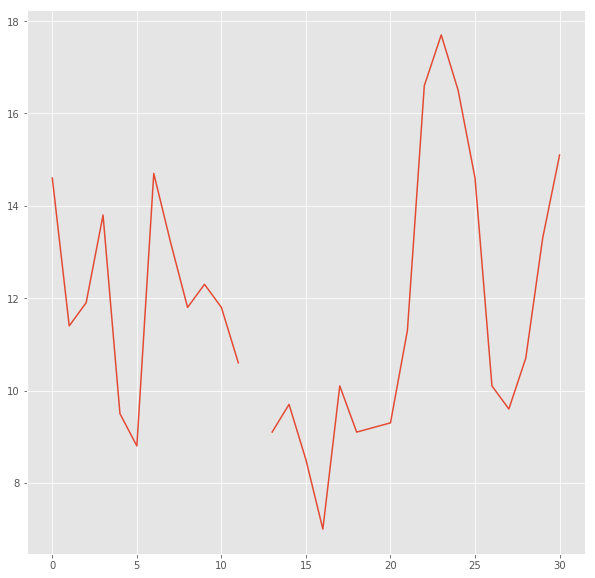

In [17]:
plt.plot(enero_pd['TEMP_MAX'])

In [18]:
enero.show(31)

+--------+--------+------------+----+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA| DIA|MES|
+--------+--------+------------+----+---+
|    14.6|     8.8|         0.0| 1.0|1.0|
|    11.4|     5.8|         0.1| 2.0|1.0|
|    11.9|     5.1|         0.0| 3.0|1.0|
|    13.8|     7.2|         0.0| 4.0|1.0|
|     9.5|     4.6|         0.0| 5.0|1.0|
|     8.8|     1.6|         0.0| 6.0|1.0|
|    14.7|     8.7|         0.0| 7.0|1.0|
|    13.2|    10.4|         0.0| 8.0|1.0|
|    11.8|     8.6|         0.0| 9.0|1.0|
|    12.3|     9.4|         0.0|10.0|1.0|
|    11.8|     5.7|         0.0|11.0|1.0|
|    10.6|     3.3|         0.0|12.0|1.0|
|    null|    null|        null|13.0|1.0|
|     9.1|     4.4|         1.0|14.0|1.0|
|     9.7|     4.8|         5.4|15.0|1.0|
|     8.5|     0.9|         0.0|16.0|1.0|
|     7.0|    -0.5|         0.0|17.0|1.0|
|    10.1|     2.6|         0.0|18.0|1.0|
|     9.1|     2.6|         0.0|19.0|1.0|
|     9.2|     2.3|         0.0|20.0|1.0|
|     9.3|     5.1|         0.0|21

In [39]:
enero.dropna().show(31)

+--------+--------+------------+----+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA| DIA|MES|
+--------+--------+------------+----+---+
|    14.6|     8.8|         0.0| 1.0|1.0|
|    11.4|     5.8|         0.1| 2.0|1.0|
|    11.9|     5.1|         0.0| 3.0|1.0|
|    13.8|     7.2|         0.0| 4.0|1.0|
|     9.5|     4.6|         0.0| 5.0|1.0|
|     8.8|     1.6|         0.0| 6.0|1.0|
|    14.7|     8.7|         0.0| 7.0|1.0|
|    13.2|    10.4|         0.0| 8.0|1.0|
|    11.8|     8.6|         0.0| 9.0|1.0|
|    12.3|     9.4|         0.0|10.0|1.0|
|    11.8|     5.7|         0.0|11.0|1.0|
|    10.6|     3.3|         0.0|12.0|1.0|
|     9.1|     4.4|         1.0|14.0|1.0|
|     9.7|     4.8|         5.4|15.0|1.0|
|     8.5|     0.9|         0.0|16.0|1.0|
|     7.0|    -0.5|         0.0|17.0|1.0|
|    10.1|     2.6|         0.0|18.0|1.0|
|     9.1|     2.6|         0.0|19.0|1.0|
|     9.2|     2.3|         0.0|20.0|1.0|
|     9.3|     5.1|         0.0|21.0|1.0|
|    11.3|     6.5|         0.0|22

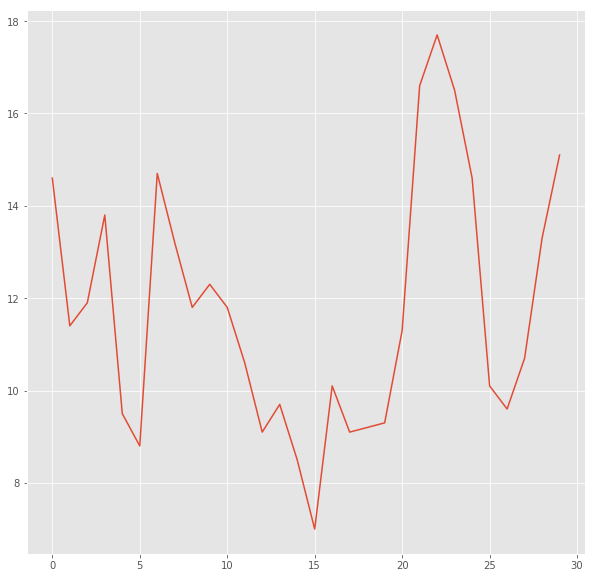

In [42]:
plt.plot(enero.dropna().toPandas()['TEMP_MAX'])

## SUSTITUIMOS EL VALOR QUE FALTA DE TEMPERATURA MÁXIMA POR UN VALOR QUE NOS PAREZCA MÁS COHERENTE

In [20]:
media_enero = enero_pd["TEMP_MAX"].mean()

In [21]:
enero_media = enero.fillna({'TEMP_MAX':media_enero})

In [22]:
enero_pd_media = enero_media.toPandas()

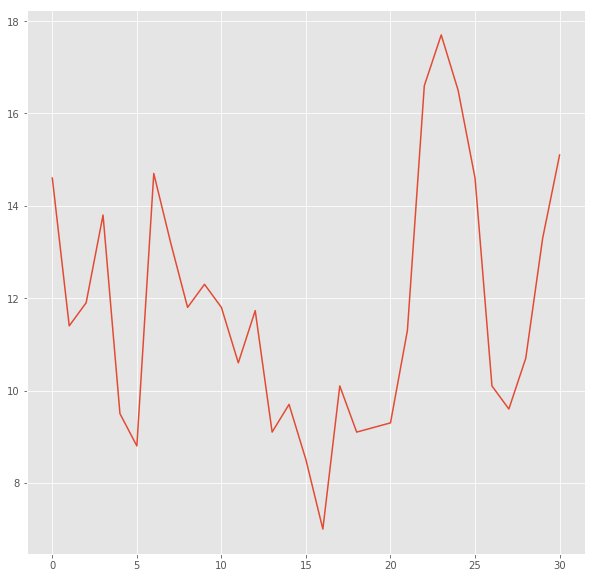

In [24]:
plt.plot(enero_pd_media['TEMP_MAX'])

In [29]:
enero_13=(enero_pd["TEMP_MAX"][11]+enero_pd["TEMP_MAX"][13])/2

In [30]:
enero_sel = enero.fillna({'TEMP_MAX':enero_13})

In [31]:
enero_pd_sel = enero_sel.toPandas()

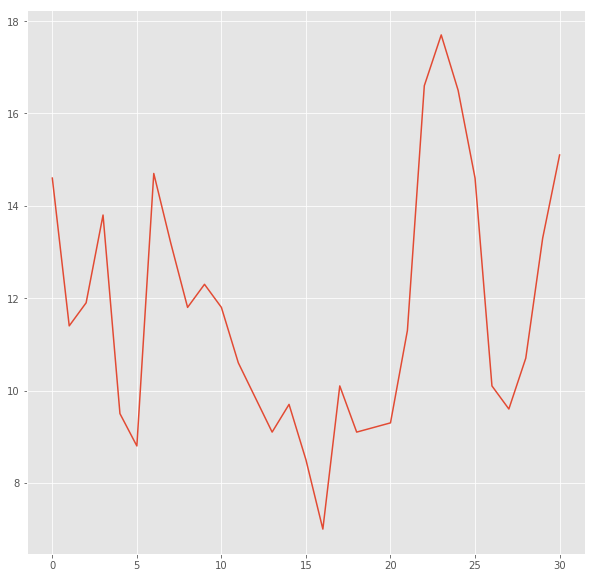

In [32]:
plt.plot(enero_pd_sel['TEMP_MAX'])

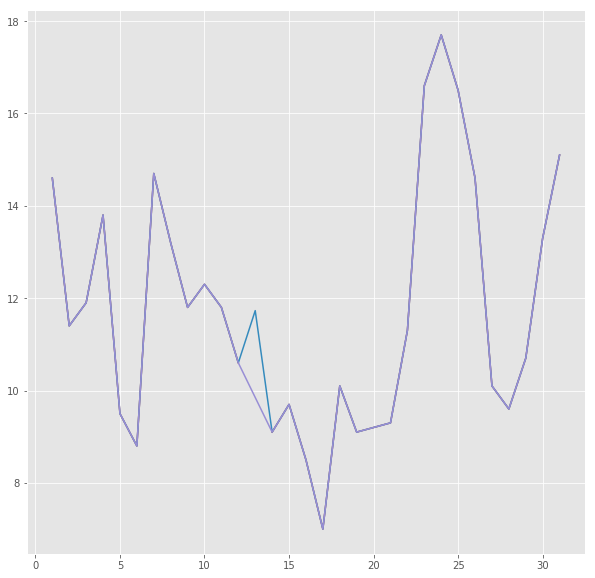

In [33]:
plt.plot(enero_pd['DIA'],enero_pd['TEMP_MAX'],enero_pd_media['DIA'],enero_pd_media['TEMP_MAX'],enero_pd_sel['DIA'],enero_pd_sel['TEMP_MAX'])

In [44]:
enero = enero_sel
enero.show()

+--------+--------+------------+----+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA| DIA|MES|
+--------+--------+------------+----+---+
|    14.6|     8.8|         0.0| 1.0|1.0|
|    11.4|     5.8|         0.1| 2.0|1.0|
|    11.9|     5.1|         0.0| 3.0|1.0|
|    13.8|     7.2|         0.0| 4.0|1.0|
|     9.5|     4.6|         0.0| 5.0|1.0|
|     8.8|     1.6|         0.0| 6.0|1.0|
|    14.7|     8.7|         0.0| 7.0|1.0|
|    13.2|    10.4|         0.0| 8.0|1.0|
|    11.8|     8.6|         0.0| 9.0|1.0|
|    12.3|     9.4|         0.0|10.0|1.0|
|    11.8|     5.7|         0.0|11.0|1.0|
|    10.6|     3.3|         0.0|12.0|1.0|
|    9.85|    null|        null|13.0|1.0|
|     9.1|     4.4|         1.0|14.0|1.0|
|     9.7|     4.8|         5.4|15.0|1.0|
|     8.5|     0.9|         0.0|16.0|1.0|
|     7.0|    -0.5|         0.0|17.0|1.0|
|    10.1|     2.6|         0.0|18.0|1.0|
|     9.1|     2.6|         0.0|19.0|1.0|
|     9.2|     2.3|         0.0|20.0|1.0|
+--------+--------+------------+--

## HACEMOS EL MISMO PROCEDIMIENTO PARA EL VALOR QUE FALTA DE TEMPERATURA MINIMA

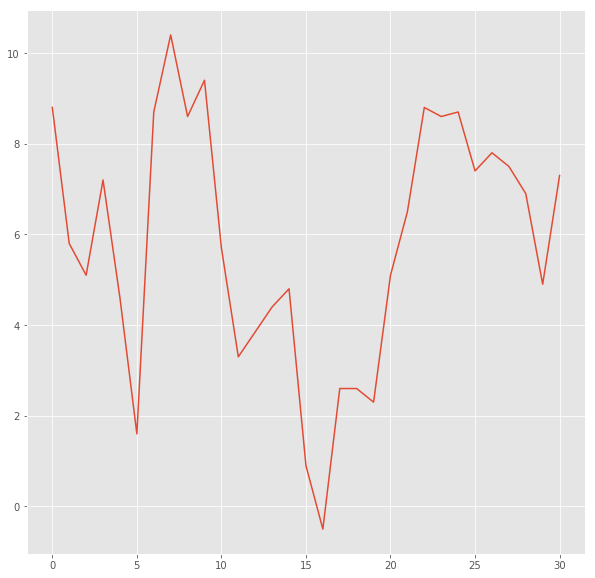

In [45]:
enero_13=(enero_pd["TEMP_MIN"][11]+enero_pd["TEMP_MIN"][13])/2
enero_sel = enero.fillna({'TEMP_MIN':enero_13})
enero_pd_sel = enero_sel.toPandas()
plt.plot(enero_pd_sel['TEMP_MIN'])

Vamos a poner etiquetas en los ejes x e y, además de un título

In [47]:
plt.ylabel?

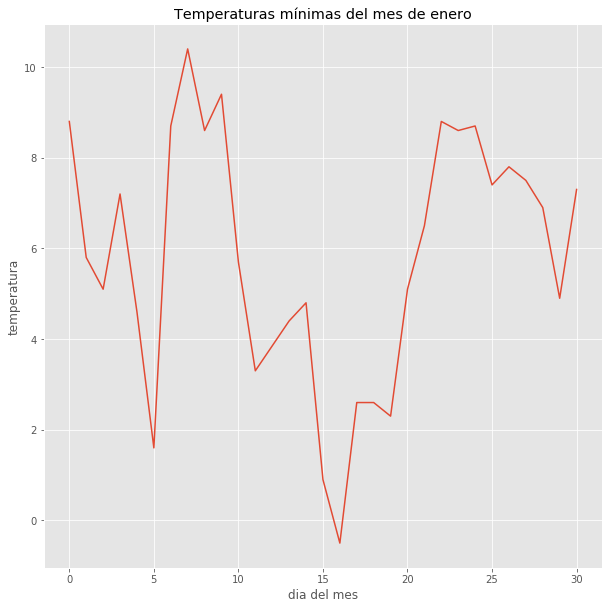

In [51]:
plt.plot(enero_pd_sel['TEMP_MIN'])
plt.ylabel('temperatura')
plt.xlabel('dia del mes')
plt.title('Temperaturas mínimas del mes de enero')
plt.show()

## VAMOS A INTENTAR DIBUJAR LA GRÁFICA EN OTRO COLOR

In [52]:
plt.plot?

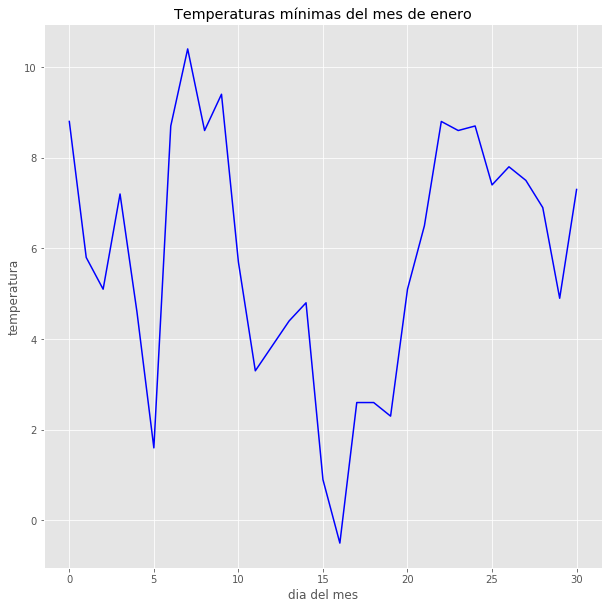

In [55]:
plt.plot(enero_pd_sel['TEMP_MIN'], 'b')
plt.ylabel('temperatura')
plt.xlabel('dia del mes')
plt.title('Temperaturas mínimas del mes de enero')
plt.show()

## AHORA METEMOS LAS DOS CURVAS DE TEMPERATURA DEL MES DE ENERO EN LA MISMA GRÁFICA

In [ ]:
plt.legend?

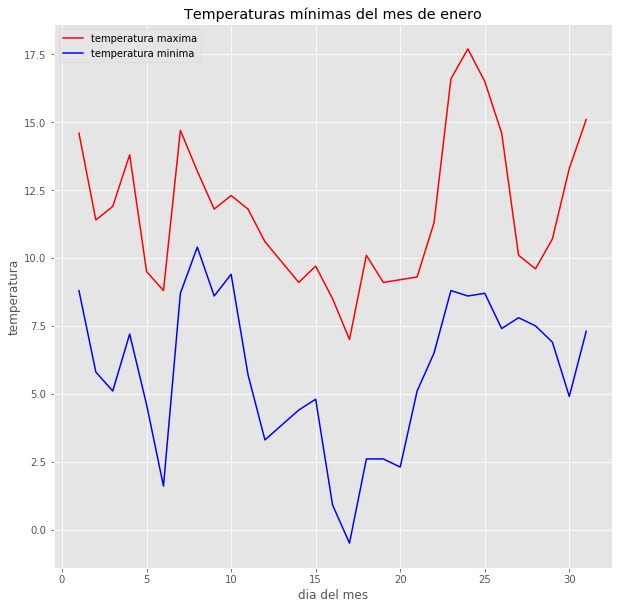

In [61]:
plt.plot(enero_pd_sel['DIA'],enero_pd_sel['TEMP_MAX'],'r',label='temperatura maxima')
plt.plot(enero_pd_sel['DIA'],enero_pd_sel['TEMP_MIN'],'b',label='temperatura minima')
plt.ylabel('temperatura')
plt.xlabel('dia del mes')
plt.title('Temperaturas mínimas del mes de enero')
plt.legend()
plt.show()

# EJERCICIO 1: REALIZAR EL MISMO DESARROLLO PARA EL MES DE MAYO

NOTA: Al haber dos valores nulos, intentar no asignar el mismo valor a los dos

In [62]:
mayo = meteo.filter('MES == 5')

In [64]:
mayo.show(31)

+--------+--------+------------+----+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA| DIA|MES|
+--------+--------+------------+----+---+
|    null|    null|        null| 1.0|5.0|
|    23.8|     5.3|         3.4| 2.0|5.0|
|    26.7|    10.8|         0.5| 3.0|5.0|
|    27.5|    13.5|        14.4| 4.0|5.0|
|    21.1|    13.5|         9.2| 5.0|5.0|
|    16.0|    11.1|         2.4| 6.0|5.0|
|    17.0|    11.1|         0.0| 7.0|5.0|
|    null|    null|        null| 8.0|5.0|
|    13.9|     8.7|         0.1| 9.0|5.0|
|    16.9|     8.7|         0.0|10.0|5.0|
|    16.2|     7.3|         0.0|11.0|5.0|
|    16.1|     8.6|         0.0|12.0|5.0|
|    16.9|     8.8|         0.0|13.0|5.0|
|    19.8|     9.4|         0.0|14.0|5.0|
|    20.6|    13.3|         0.0|15.0|5.0|
|    24.0|    10.1|         0.0|16.0|5.0|
|    25.1|    12.4|         0.0|17.0|5.0|
|    26.2|    13.0|         0.0|18.0|5.0|
|    26.3|    13.3|         4.8|19.0|5.0|
|    28.5|    14.3|         2.3|20.0|5.0|
|    29.5|    16.0|         0.0|21

In [86]:
mayo_1 = mayo.filter('DIA <= 5')
mayo_1.show()

+--------+--------+------------+---+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA|DIA|MES|
+--------+--------+------------+---+---+
|    null|    null|        null|1.0|5.0|
|    23.8|     5.3|         3.4|2.0|5.0|
|    26.7|    10.8|         0.5|3.0|5.0|
|    27.5|    13.5|        14.4|4.0|5.0|
|    21.1|    13.5|         9.2|5.0|5.0|
+--------+--------+------------+---+---+



In [88]:
mayo_1_pd = mayo_1.toPandas()
mayo_1 = mayo_1.fillna({'TEMP_MAX': mayo_1_pd['TEMP_MAX'][1],'TEMP_MIN': mayo_1_pd['TEMP_MIN'][1]})
mayo_1.show()

+--------+--------+------------+---+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA|DIA|MES|
+--------+--------+------------+---+---+
|    23.8|     5.3|        null|1.0|5.0|
|    23.8|     5.3|         3.4|2.0|5.0|
|    26.7|    10.8|         0.5|3.0|5.0|
|    27.5|    13.5|        14.4|4.0|5.0|
|    21.1|    13.5|         9.2|5.0|5.0|
+--------+--------+------------+---+---+



In [89]:
mayo_2 = mayo.filter('DIA > 5')
mayo_2.show()

+--------+--------+------------+----+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA| DIA|MES|
+--------+--------+------------+----+---+
|    16.0|    11.1|         2.4| 6.0|5.0|
|    17.0|    11.1|         0.0| 7.0|5.0|
|    null|    null|        null| 8.0|5.0|
|    13.9|     8.7|         0.1| 9.0|5.0|
|    16.9|     8.7|         0.0|10.0|5.0|
|    16.2|     7.3|         0.0|11.0|5.0|
|    16.1|     8.6|         0.0|12.0|5.0|
|    16.9|     8.8|         0.0|13.0|5.0|
|    19.8|     9.4|         0.0|14.0|5.0|
|    20.6|    13.3|         0.0|15.0|5.0|
|    24.0|    10.1|         0.0|16.0|5.0|
|    25.1|    12.4|         0.0|17.0|5.0|
|    26.2|    13.0|         0.0|18.0|5.0|
|    26.3|    13.3|         4.8|19.0|5.0|
|    28.5|    14.3|         2.3|20.0|5.0|
|    29.5|    16.0|         0.0|21.0|5.0|
|    23.1|    15.0|         0.0|22.0|5.0|
|    22.5|    10.8|         0.0|23.0|5.0|
|    25.6|    14.9|         0.0|24.0|5.0|
|    21.1|    14.7|         0.0|25.0|5.0|
+--------+--------+------------+--

In [90]:
mayo_2_pd = mayo_2.toPandas()
mayo_8_max = (mayo_2_pd['TEMP_MAX'][6]+mayo_2_pd['TEMP_MAX'][8])/2
mayo_8_min = (mayo_2_pd['TEMP_MIN'][6]+mayo_2_pd['TEMP_MIN'][8])/2
mayo_2 = mayo_2.fillna({'TEMP_MAX': mayo_1_pd['TEMP_MAX'][1],'TEMP_MIN': mayo_1_pd['TEMP_MIN'][1]})
mayo_2.show()

+--------+--------+------------+----+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA| DIA|MES|
+--------+--------+------------+----+---+
|    16.0|    11.1|         2.4| 6.0|5.0|
|    17.0|    11.1|         0.0| 7.0|5.0|
|    23.8|     5.3|        null| 8.0|5.0|
|    13.9|     8.7|         0.1| 9.0|5.0|
|    16.9|     8.7|         0.0|10.0|5.0|
|    16.2|     7.3|         0.0|11.0|5.0|
|    16.1|     8.6|         0.0|12.0|5.0|
|    16.9|     8.8|         0.0|13.0|5.0|
|    19.8|     9.4|         0.0|14.0|5.0|
|    20.6|    13.3|         0.0|15.0|5.0|
|    24.0|    10.1|         0.0|16.0|5.0|
|    25.1|    12.4|         0.0|17.0|5.0|
|    26.2|    13.0|         0.0|18.0|5.0|
|    26.3|    13.3|         4.8|19.0|5.0|
|    28.5|    14.3|         2.3|20.0|5.0|
|    29.5|    16.0|         0.0|21.0|5.0|
|    23.1|    15.0|         0.0|22.0|5.0|
|    22.5|    10.8|         0.0|23.0|5.0|
|    25.6|    14.9|         0.0|24.0|5.0|
|    21.1|    14.7|         0.0|25.0|5.0|
+--------+--------+------------+--

In [92]:
mayo = mayo_1.union(mayo_2)
mayo.show()

+--------+--------+------------+----+---+
|TEMP_MAX|TEMP_MIN|PLUVIOMETRIA| DIA|MES|
+--------+--------+------------+----+---+
|    23.8|     5.3|        null| 1.0|5.0|
|    23.8|     5.3|         3.4| 2.0|5.0|
|    26.7|    10.8|         0.5| 3.0|5.0|
|    27.5|    13.5|        14.4| 4.0|5.0|
|    21.1|    13.5|         9.2| 5.0|5.0|
|    16.0|    11.1|         2.4| 6.0|5.0|
|    17.0|    11.1|         0.0| 7.0|5.0|
|    23.8|     5.3|        null| 8.0|5.0|
|    13.9|     8.7|         0.1| 9.0|5.0|
|    16.9|     8.7|         0.0|10.0|5.0|
|    16.2|     7.3|         0.0|11.0|5.0|
|    16.1|     8.6|         0.0|12.0|5.0|
|    16.9|     8.8|         0.0|13.0|5.0|
|    19.8|     9.4|         0.0|14.0|5.0|
|    20.6|    13.3|         0.0|15.0|5.0|
|    24.0|    10.1|         0.0|16.0|5.0|
|    25.1|    12.4|         0.0|17.0|5.0|
|    26.2|    13.0|         0.0|18.0|5.0|
|    26.3|    13.3|         4.8|19.0|5.0|
|    28.5|    14.3|         2.3|20.0|5.0|
+--------+--------+------------+--

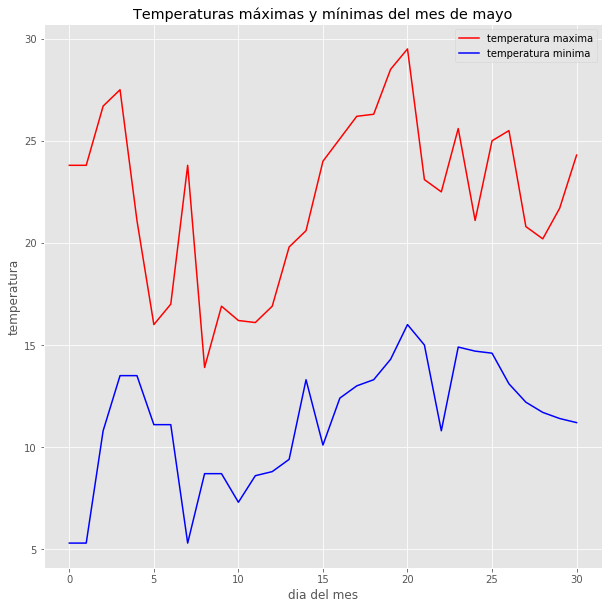

In [93]:
mayo_pd = mayo.toPandas()
plt.plot(mayo_pd['TEMP_MAX'],'r',label='temperatura maxima')
plt.plot(mayo_pd['TEMP_MIN'],'b',label='temperatura minima')
plt.ylabel('temperatura')
plt.xlabel('dia del mes')
plt.title('Temperaturas máximas y mínimas del mes de mayo')
plt.legend()
plt.show()

## EJERCICIO 2: REPRESENTAR EL NIVEL DE PRECIPITACIONES DEL MES DE ENERO POR DÍA

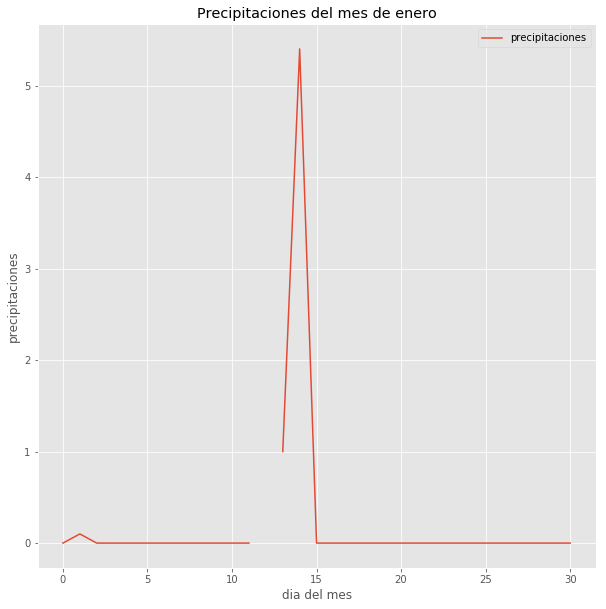

In [94]:
plt.plot(enero_pd['PLUVIOMETRIA'],label='precipitaciones')
plt.ylabel('precipitaciones')
plt.xlabel('dia del mes')
plt.title('Precipitaciones del mes de enero')
plt.legend()
plt.show()

In [95]:
enero_pd = enero_pd.dropna()

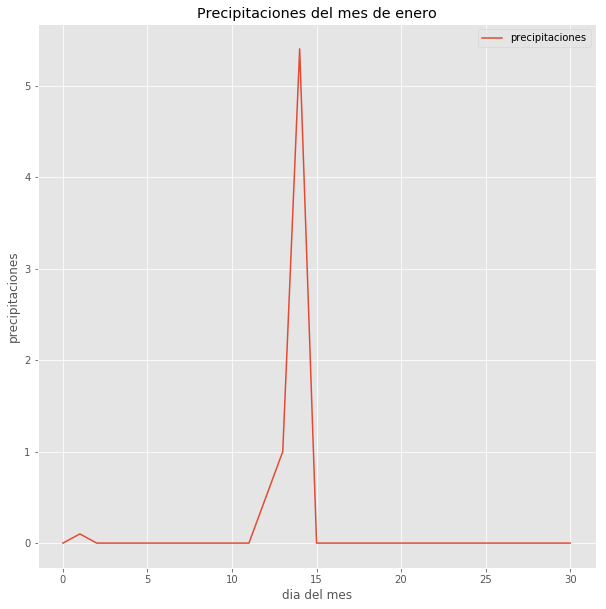

In [96]:
plt.plot(enero_pd['PLUVIOMETRIA'],label='precipitaciones')
plt.ylabel('precipitaciones')
plt.xlabel('dia del mes')
plt.title('Precipitaciones del mes de enero')
plt.legend()
plt.show()

Vamos a intentar representar la pluviometría con un gráfico de barras por día

In [97]:
plt.bar?

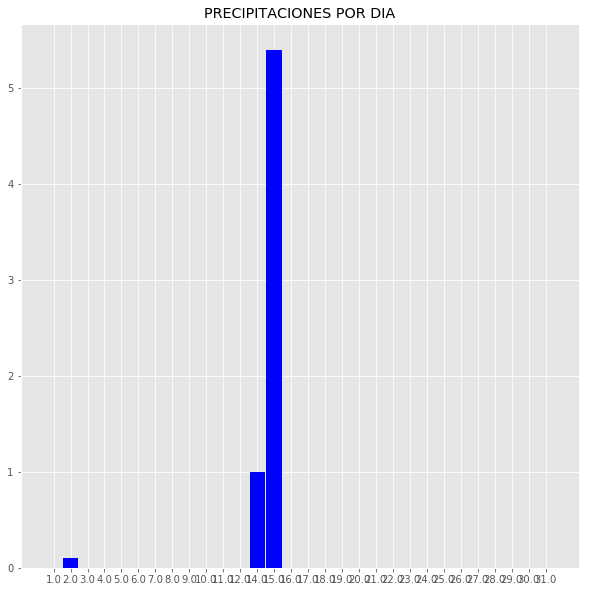

In [99]:
N = len(enero_pd)
ind = np.arange(N) # the x locations for the groups
width = 0.9       # the width of the bars: can also be len(x) sequence
plt.bar(ind, enero_pd.PLUVIOMETRIA, width, color='b')
plt.xticks(ind, enero_pd.DIA)
plt.title('PRECIPITACIONES POR DIA')
plt.show()

## EJERCICIO 3: REALIZAR LA MISMA REPRESENTACIÓN PARA EL MES DE MAYO

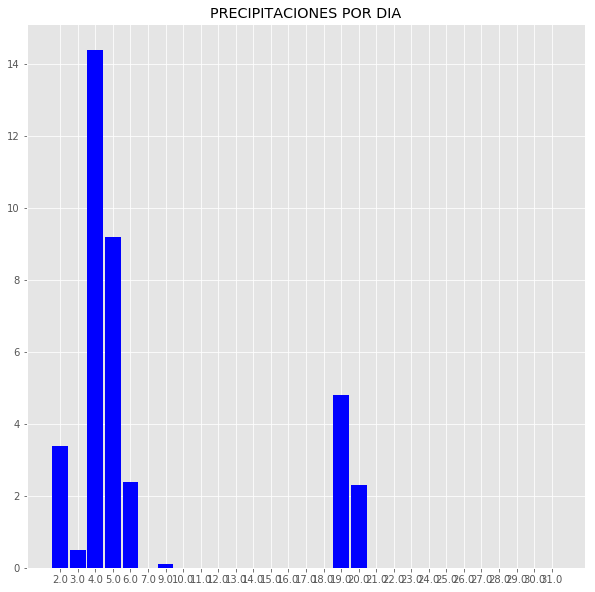

In [101]:
mayo_pd = mayo.dropna().toPandas()
N = len(mayo_pd)
ind = np.arange(N) # the x locations for the groups
width = 0.9       # the width of the bars: can also be len(x) sequence
plt.bar(ind, mayo_pd.PLUVIOMETRIA, width, color='b')
plt.xticks(ind, mayo_pd.DIA)
plt.title('PRECIPITACIONES POR DIA')
plt.show()

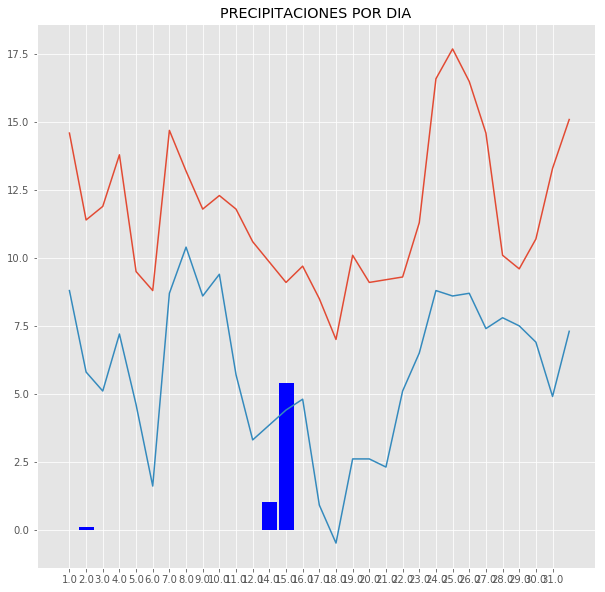

In [104]:
N = len(enero_pd)
ind = np.arange(N) # the x locations for the groups
width = 0.9       # the width of the bars: can also be len(x) sequence
plt.bar(ind, enero_pd.PLUVIOMETRIA, width, color='b')
plt.xticks(ind, enero_pd.DIA)
plt.title('PRECIPITACIONES POR DIA')
plt.plot(enero_pd['TEMP_MAX'])
plt.plot(enero_pd['TEMP_MIN'])
plt.show()

Si queremos tener dos ejes distintos para los dos tipos de gráfica

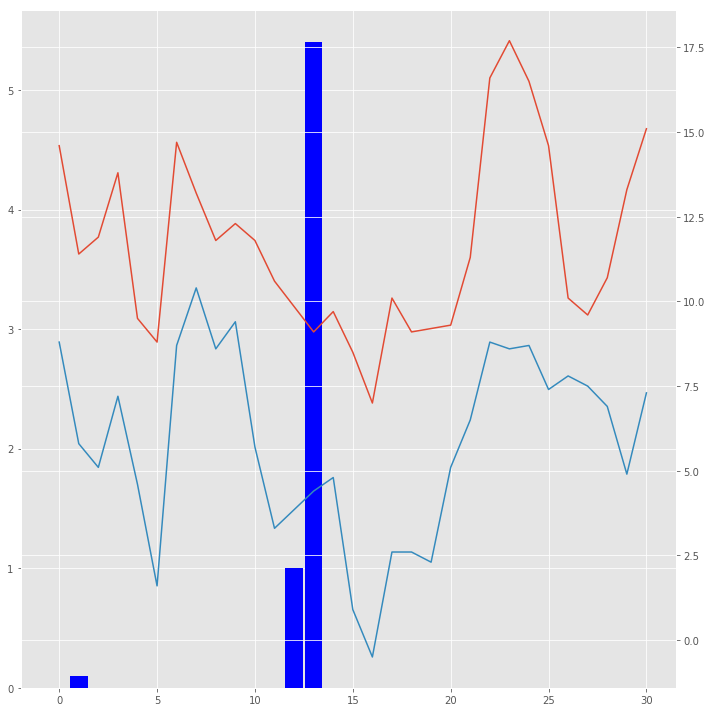

In [106]:
fig, ax1 = plt.subplots()

N = len(enero_pd)
ind = np.arange(N) # the x locations for the groups
width = 0.9       # the width of the bars: can also be len(x) sequence
ax1.bar(ind, enero_pd.PLUVIOMETRIA, width, color='b')

ax2 = ax1.twinx()

ax2.plot(enero_pd['TEMP_MAX'])
ax2.plot(enero_pd['TEMP_MIN'])

fig.tight_layout()
plt.show()

## EJERCICIO 4: REALIZAR LA MISMA REPRESENTACIÓN PARA EL MES DE MAYO

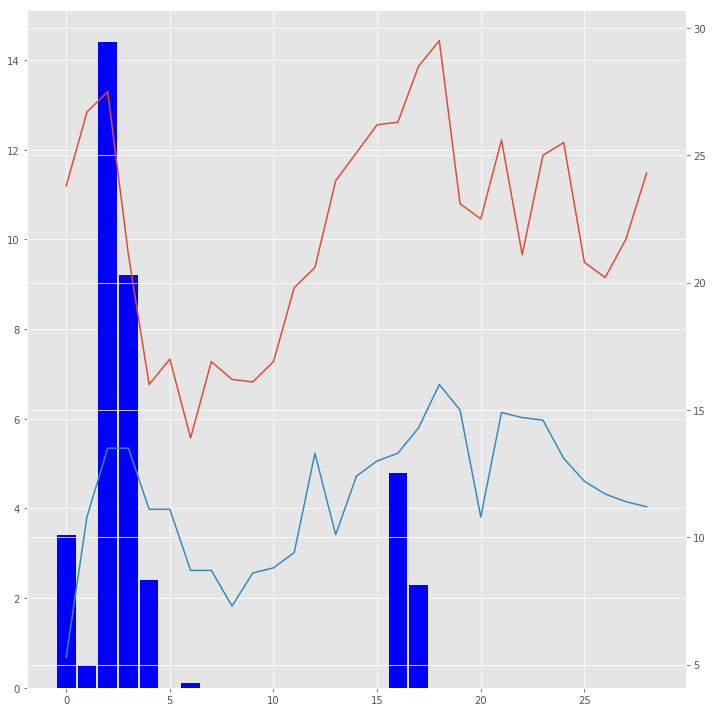

In [109]:
fig, ax1 = plt.subplots()

N = len(mayo_pd)
ind = np.arange(N) # the x locations for the groups
width = 0.9       # the width of the bars: can also be len(x) sequence
ax1.bar(ind, mayo_pd.PLUVIOMETRIA, width, color='b')

ax2 = ax1.twinx()

ax2.plot(mayo_pd['TEMP_MAX'])
ax2.plot(mayo_pd['TEMP_MIN'])

fig.tight_layout()
plt.show()

# DETECCION DE OUTLIERS

## REPRESENTAMOS AHORA LA TEMPERATURA MÁXIMA DIARIA DE TODO EL AÑO

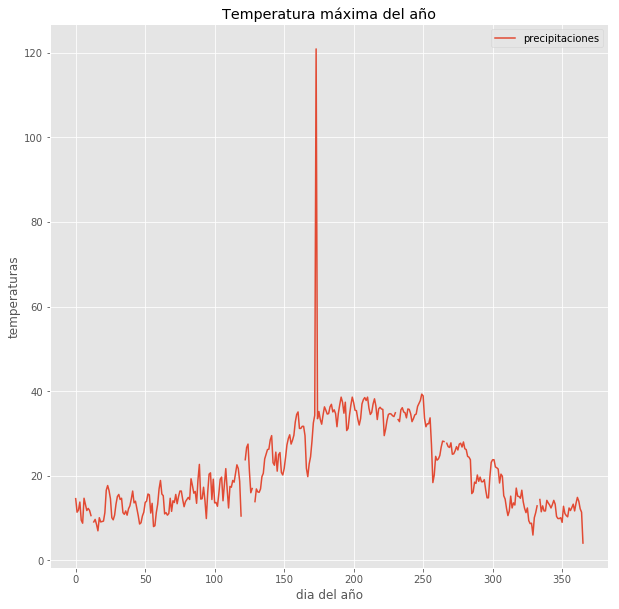

In [110]:
meteo_pd = meteo.toPandas()

plt.plot(meteo_pd['TEMP_MAX'],label='precipitaciones')
plt.ylabel('temperaturas')
plt.xlabel('dia del año')
plt.title('Temperatura máxima del año')
plt.legend()
plt.show()

In [122]:
meteo.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|          TEMP_MAX|          TEMP_MIN|      PLUVIOMETRIA|               DIA|               MES|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|               359|               359|               359|               366|               366|
|   mean| 21.56796657381616|11.501949860724238|0.6679665738161562|15.756830601092895|6.5136612021857925|
| stddev|10.753263973189341| 6.759654513976069| 2.374881129397394| 8.823591963189891|3.4559584020474516|
|    min|               4.1|              -2.1|               0.0|               1.0|               1.0|
|    max|             120.9|              27.0|              19.8|              31.0|              12.0|
+-------+------------------+------------------+------------------+------------------+------------------+



In [111]:
meteo_filter = meteo.filter('TEMP_MAX < 50').dropna()
meteo_filter_pd = meteo_filter.toPandas()

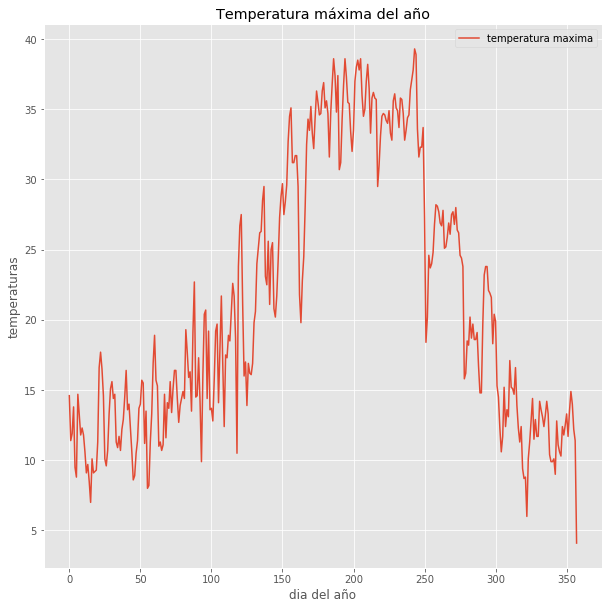

In [112]:
plt.plot(meteo_filter_pd['TEMP_MAX'],label='temperatura maxima')
plt.ylabel('temperaturas')
plt.xlabel('dia del año')
plt.title('Temperatura máxima del año')
plt.legend()
plt.show()

Añadimos a la gráfica la temperatura mínima diaria

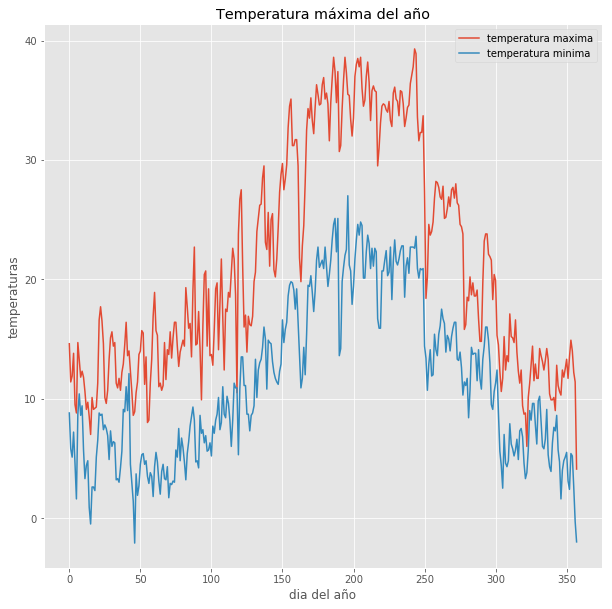

In [114]:
plt.plot(meteo_filter_pd['TEMP_MAX'],label='temperatura maxima')
plt.plot(meteo_filter_pd['TEMP_MIN'],label='temperatura minima')
plt.ylabel('temperaturas')
plt.xlabel('dia del año')
plt.title('Temperatura máxima del año')
plt.legend()
plt.show()

## EJERCICIO 5: REPRESENTAR LA EVOLUCIÓN DE LA MEDIA MENSUAL DE TEMPERATURAS

In [150]:
meteo_media = meteo_pd.groupby('MES').mean()

In [151]:
meteo_media

,TEMP_MAX,TEMP_MIN,PLUVIOMETRIA,DIA
MES,,,,
1.0,11.730000,5.860000,0.216667,16.0
2.0,12.400000,4.872414,0.193103,15.0
3.0,15.019355,4.770968,0.716129,16.0
4.0,16.917241,7.886207,1.986207,15.5
5.0,22.134483,11.682759,1.279310,16.0
6.0,33.620000,17.203333,0.000000,15.5
7.0,35.603226,21.658065,0.000000,16.0
8.0,34.600000,21.040000,0.336667,16.0
9.0,29.427586,17.375862,0.013793,15.5


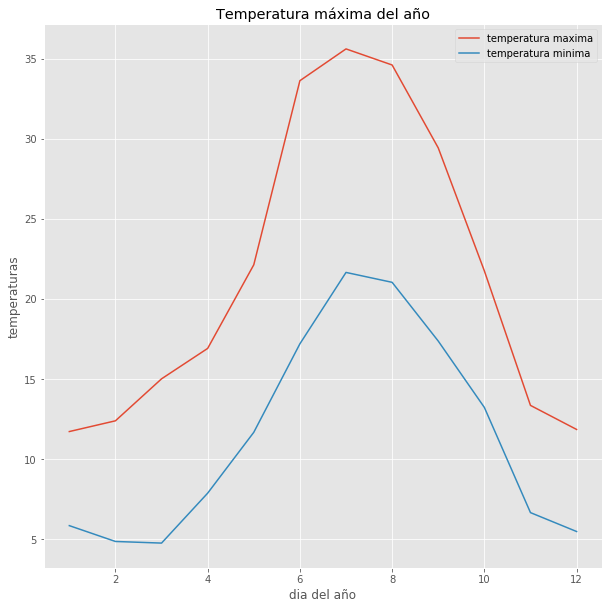

In [152]:
plt.plot(meteo_media['TEMP_MAX'],label='temperatura maxima')
plt.plot(meteo_media['TEMP_MIN'],label='temperatura minima')
plt.ylabel('temperaturas')
plt.xlabel('dia del año')
plt.title('Temperatura máxima del año')
plt.legend()
plt.show()

## EJERCICIO 6: REPRESENTAR LAS LLUVIAS ACUMULADAS POR MES EN GRÁFICAS DE BARRAS

In [153]:
meteo_sum = meteo_pd.groupby('MES').sum()

In [154]:
meteo_sum

,TEMP_MAX,TEMP_MIN,PLUVIOMETRIA,DIA
MES,,,,
1.0,351.9,175.8,6.5,496.0
2.0,359.6,141.3,5.6,435.0
3.0,465.6,147.9,22.2,496.0
4.0,490.6,228.7,57.6,465.0
5.0,641.9,338.8,37.1,496.0
6.0,1008.6,516.1,0.0,465.0
7.0,1103.7,671.4,0.0,496.0
8.0,1038.0,631.2,10.1,496.0
9.0,853.4,503.9,0.4,465.0


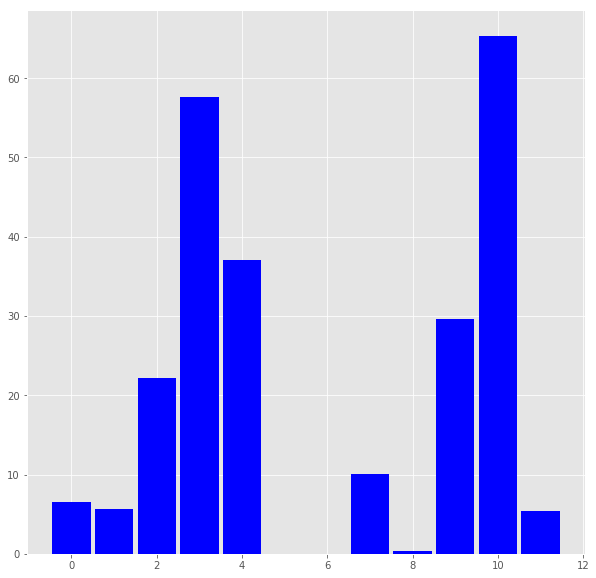

In [155]:
N = len(meteo_sum)
ind = np.arange(N) # the x locations for the groups
width = 0.9       # the width of the bars: can also be len(x) sequence
plt.bar(ind, meteo_sum.PLUVIOMETRIA, width, color='b')
plt.show()

# LIBRERIA SEABORN

In [156]:
import seaborn as sns

In [167]:
sns.__version__

'0.7.1'

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


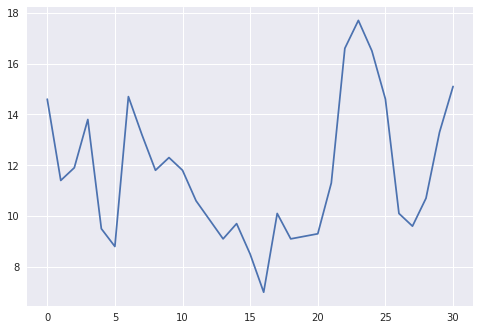

In [158]:
plt.plot(enero_pd['TEMP_MAX'])

## EJERCICIO 7: REPRESENTAR LAS TEMPERATURAS MÁXIMAS MEDIANTE UN DIAGRAMA DE CAJAS

In [159]:
sns.boxplot?

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


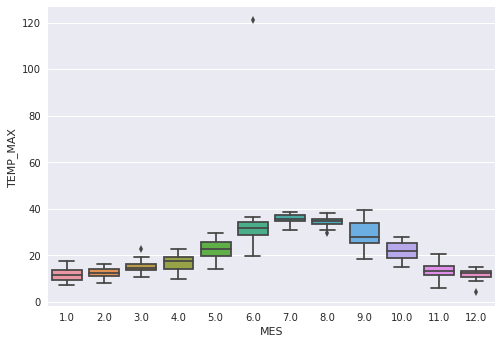

In [160]:
sns.boxplot(x="MES", y="TEMP_MAX", data=meteo_pd);

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


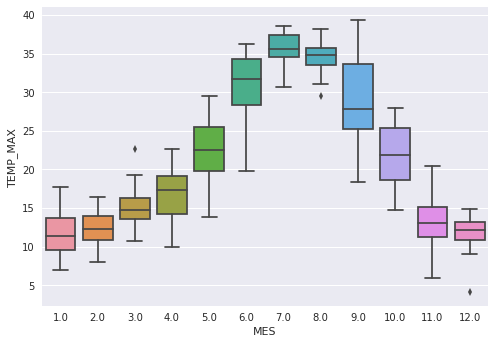

In [161]:
sns.boxplot(x="MES", y="TEMP_MAX", data=meteo_filter_pd);

## EJERCICIO 8: REPRESENTAR LAS TEMPERATURAS MÍNIMAS POR MES EN UN "STRIP-PLOT"

In [164]:
sns.stripplot?

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


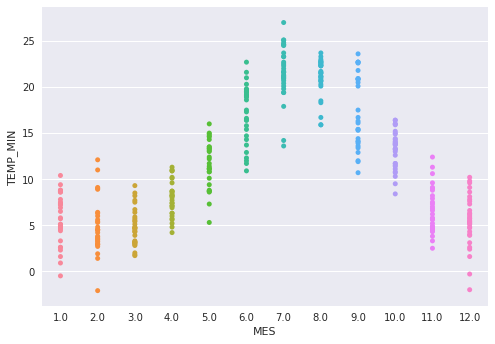

In [162]:
sns.stripplot(x='MES', y="TEMP_MIN", data=meteo_filter_pd);

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


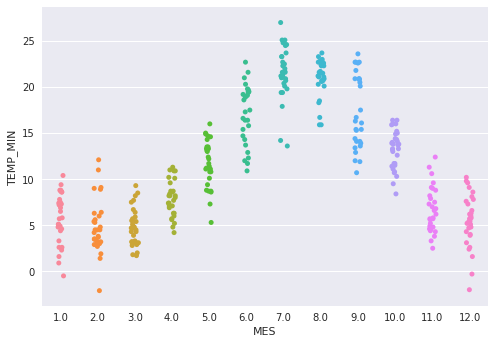

In [165]:
sns.stripplot(x='MES', y="TEMP_MIN", data=meteo_filter_pd, jitter=True);

# Conversión de formatos

In [172]:
meteo.printSchema()

root
 |-- TEMP_MAX: double (nullable = true)
 |-- TEMP_MIN: double (nullable = true)
 |-- PLUVIOMETRIA: double (nullable = true)
 |-- DIA: double (nullable = true)
 |-- MES: double (nullable = true)



In [175]:
from pyspark.sql.types import StringType
meteo_txt = meteo.withColumn("DIA", meteo['DIA'].cast(StringType()))\
            .withColumn("MES", meteo['MES'].cast(StringType()))

In [177]:
meteo_txt.printSchema()

root
 |-- TEMP_MAX: double (nullable = true)
 |-- TEMP_MIN: double (nullable = true)
 |-- PLUVIOMETRIA: double (nullable = true)
 |-- DIA: string (nullable = true)
 |-- MES: string (nullable = true)



In [178]:
meteo_txt.head(5)

[Row(TEMP_MAX=14.6, TEMP_MIN=8.8, PLUVIOMETRIA=0.0, DIA='1.0', MES='1.0'),
 Row(TEMP_MAX=11.4, TEMP_MIN=5.8, PLUVIOMETRIA=0.1, DIA='2.0', MES='1.0'),
 Row(TEMP_MAX=11.9, TEMP_MIN=5.1, PLUVIOMETRIA=0.0, DIA='3.0', MES='1.0'),
 Row(TEMP_MAX=13.8, TEMP_MIN=7.2, PLUVIOMETRIA=0.0, DIA='4.0', MES='1.0'),
 Row(TEMP_MAX=9.5, TEMP_MIN=4.6, PLUVIOMETRIA=0.0, DIA='5.0', MES='1.0')]

In [180]:
meteo.head(5)

[Row(TEMP_MAX=14.6, TEMP_MIN=8.8, PLUVIOMETRIA=0.0, DIA=1.0, MES=1.0),
 Row(TEMP_MAX=11.4, TEMP_MIN=5.8, PLUVIOMETRIA=0.1, DIA=2.0, MES=1.0),
 Row(TEMP_MAX=11.9, TEMP_MIN=5.1, PLUVIOMETRIA=0.0, DIA=3.0, MES=1.0),
 Row(TEMP_MAX=13.8, TEMP_MIN=7.2, PLUVIOMETRIA=0.0, DIA=4.0, MES=1.0),
 Row(TEMP_MAX=9.5, TEMP_MIN=4.6, PLUVIOMETRIA=0.0, DIA=5.0, MES=1.0)]